<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/CNN_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습된 모델에 새로운 입력을 단 하나만 넣어보자

-> predict하면 되지 않을까?

-> 참고 : https://pbj0812.tistory.com/286

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers


#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',
			input_shape=input_shape))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(layers.Flatten())
		model.add(layers.Dense(500, activation='relu'))
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))
		return model



# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                  

In [ ]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
X_test[0].shape

(28, 28, 1)

In [ ]:
model.predict(X_test)

array([[1.8252416e-08, 5.7436461e-07, 1.5998515e-06, ..., 9.9986207e-01,
        3.1288579e-08, 2.3293171e-05],
       [3.1256248e-05, 6.4550113e-04, 9.9885881e-01, ..., 1.3342967e-09,
        1.0330180e-04, 9.9137987e-10],
       [9.8322416e-05, 9.9794608e-01, 5.9266575e-05, ..., 5.9600960e-04,
        2.2319348e-04, 1.0630803e-04],
       ...,
       [3.3028495e-08, 1.2838454e-07, 9.2291297e-10, ..., 3.2459195e-07,
        1.0376808e-05, 1.8176064e-04],
       [3.7293375e-04, 2.5352526e-06, 7.7757568e-07, ..., 4.8573622e-07,
        2.1110775e-01, 9.0086587e-06],
       [8.3694931e-06, 1.4446801e-10, 1.0601852e-06, ..., 1.7179452e-13,
        7.0453696e-09, 3.1978900e-10]], dtype=float32)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [ ]:
image = cv2.imread("/content/제목 없음.png")

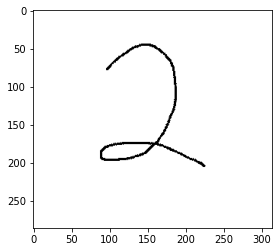

In [ ]:
plt.imshow(image)

In [ ]:
#이미지 사이즈 확인
image.size

269412

In [ ]:
image.shape

(286, 314, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# 이미지 전처리(자료형 변경)
image = cv2.resize(image, dsize = (28, 28))

In [ ]:
image.shape

(28, 28, 3)

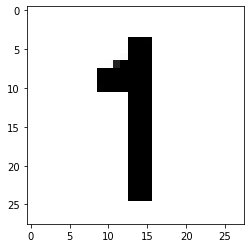

In [ ]:
plt.imshow(image)

In [ ]:
image = img_to_array(image)
image = image.reshape(1,image.shape[0],image.shape[1], image.shape[2])

In [ ]:
image.shape

(1, 28, 28, 3)

In [ ]:
image[:,:,:,0].shape

(1, 28, 28)

In [ ]:
SHAPE = (28, 28, 1)

In [ ]:
image[:,:,:,0].reshape(SHAPE).shape

(28, 28, 1)

In [ ]:
image = image[:,:,:,0].reshape(SHAPE)

In [ ]:
image.shape

(28, 28, 1)

TypeError: ignored

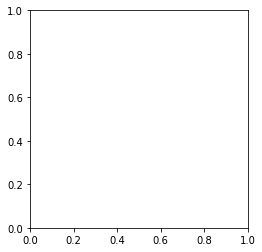

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
# 모델에 넣어준다.
# image = preprocess_input(image)

# 다른 블로그

https://copycoding.tistory.com/109

In [ ]:
image = cv2.imread("/content/45994_32005_1257.jpg")

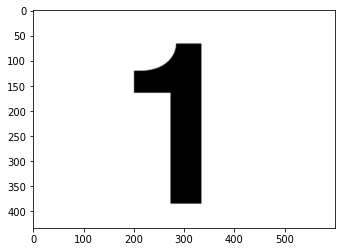

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image = cv2.resize(255-image, (28, 28))
test_num = image.flatten()/255.0
test_num = test_num.reshape(-1, 28, 28, 1)

In [ ]:
test_num.shape

(3, 28, 28, 1)

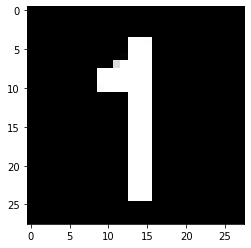

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
model.predict_classes(test_num)

AttributeError: ignored

In [ ]:
y_prob = model.predict(test_num, verbose=0) 
y_prob.argmax(axis=-1)

array([5, 3, 3])

# 이미지를 바꾼다....

In [ ]:
image = cv2.imread("/content/제목 없음.png")

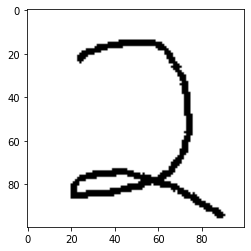

In [ ]:
plt.imshow(image)

In [ ]:
image.size

30000

In [ ]:
# ????? 왜 다 3채널이지 -> 원래 그림판이 rgb를 가진대
image.shape

(100, 100, 3)

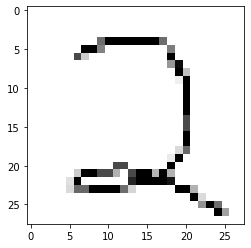

In [ ]:
image = cv2.resize(image, dsize = (28, 28))
plt.imshow(image)

In [ ]:
image.shape

(28, 28, 3)

In [ ]:
# 우리 28, 28만 필요한 거라 rgb중에서 r만 뽑자
trans_img = image.transpose(2, 0, 1) #01을 한 칸 밀고 2를 맨 앞으로 가져옴
trans_img.shape

(3, 28, 28)

In [ ]:
np.savetxt("image.csv", trans_img[0], delimiter = ',')

In [ ]:
trans_test_img = trans_img[0].reshape((1, 28*28))
trans_test_img.shape

(1, 784)

In [ ]:
trans_test_img = trans_test_img.astype('float32')/255

In [ ]:
trans_test_img.reshape(28, 28, 1).shape

(28, 28, 1)

TypeError: ignored

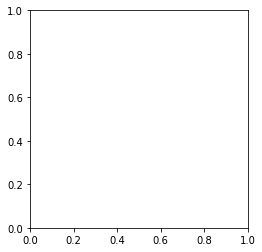

In [ ]:
plt.imshow(trans_test_img.reshape(28, 28, 1))
plt.show()

# 그냥 모델을 컬러 모델로 바꾼다

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

#define the convnet 
def build(input_shape, classes):
	model = models.Sequential() 
	model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
	model.add(layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(layers.Dropout(0.25)) 

	model.add(layers.Flatten())
	model.add(layers.Dense(512, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(classes, activation='softmax'))
	return model

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
model.fit(X_train, y_train, batch_size=BATCH_SIZE,
	epochs=EPOCHS, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE, callbacks=callbacks) 
score = model.evaluate(X_test, y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])



170508288/170498071 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)             

In [ ]:
image = cv2.imread("/content/201904291390027161_3.jpg")

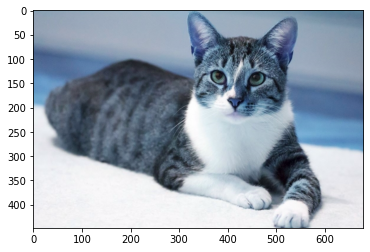

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(448, 680, 3)

In [ ]:
image.size

913920

In [ ]:
# 이미지 전처리(자료형 변경)
image = cv2.resize(image, dsize = (28, 28))

In [ ]:
image.shape

(28, 28, 3)

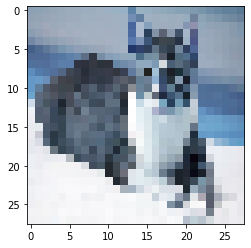

In [ ]:
plt.imshow(image)

In [ ]:
image = img_to_array(image)

In [ ]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [ ]:
image = cv2.resize(image, dsize = (IMG_COLS, IMG_ROWS))

In [ ]:
image.shape

(32, 32, 3)

In [ ]:
a = model.predict(image)
max(a)

ValueError: ignored

In [ ]:
# 입력을 한 개만 넣겠다는 의미로 1이 필요하다!!!
image = image.reshape(1,image.shape[0],image.shape[1], image.shape[2])
image.shape

(1, 32, 32, 3)

In [ ]:
a = model.predict(image)
max(a)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 결과

- 32 x 32는 알아보기 힘들다 그래서 모델이 고양이를 비행기라고 말한다.